In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme("notebook")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bike-sharing-dataset/hour.csv
/kaggle/input/bike-sharing-dataset/Readme.txt
/kaggle/input/bike-sharing-dataset/day.csv


In [2]:
bike_dataset = pd.read_csv("/kaggle/input/bike-sharing-dataset/hour.csv")
bike_dataset.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
bike_dataset.duplicated().sum()


0

In [4]:
bike_dataset.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [5]:
bike_dataset.info()
#category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
#number_features = ['temp', 'atemp', 'hum', 'windspeed']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
bike_dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
bike_dataset = bike_dataset.rename(columns={'yr':'year',
                                            'mnth':'month',
                                            'hum':'humidity',
                                            'weathersit':'weather',
                                            'cnt':'count',
                                           'hr':'hour','dteday':'datetime'
                                              })
print(bike_dataset.columns)



Index(['instant', 'datetime', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [8]:
print(len(bike_dataset.columns))


17


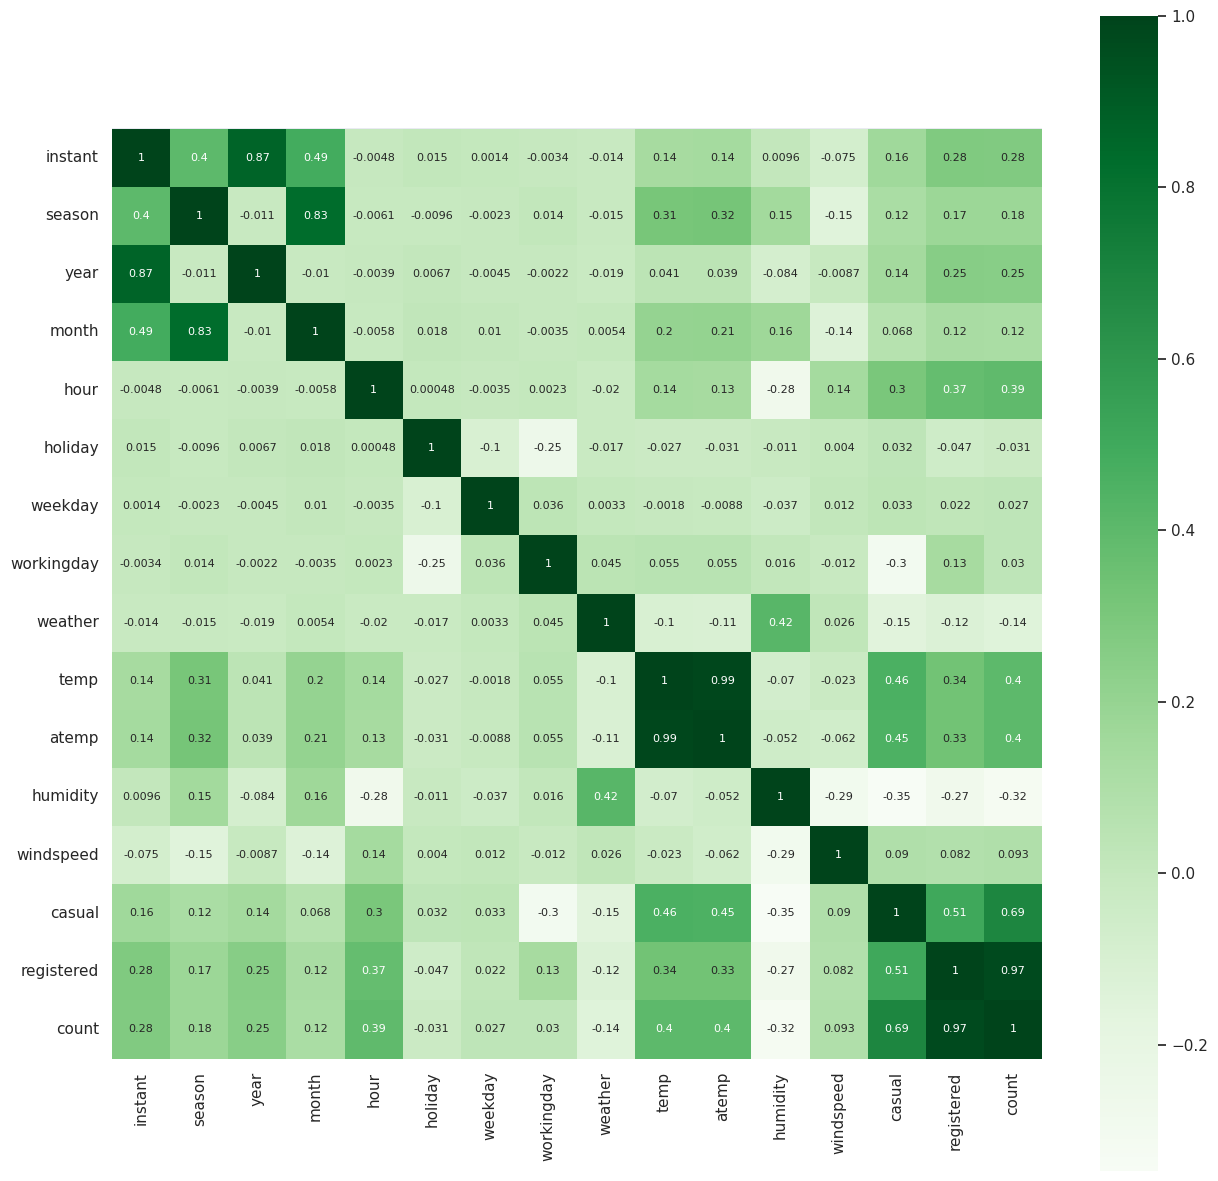

In [9]:
numeric_data = bike_dataset.select_dtypes(include=['int64', 'float64'])
correlation_values = numeric_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_values,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Greens')
plt.show() 


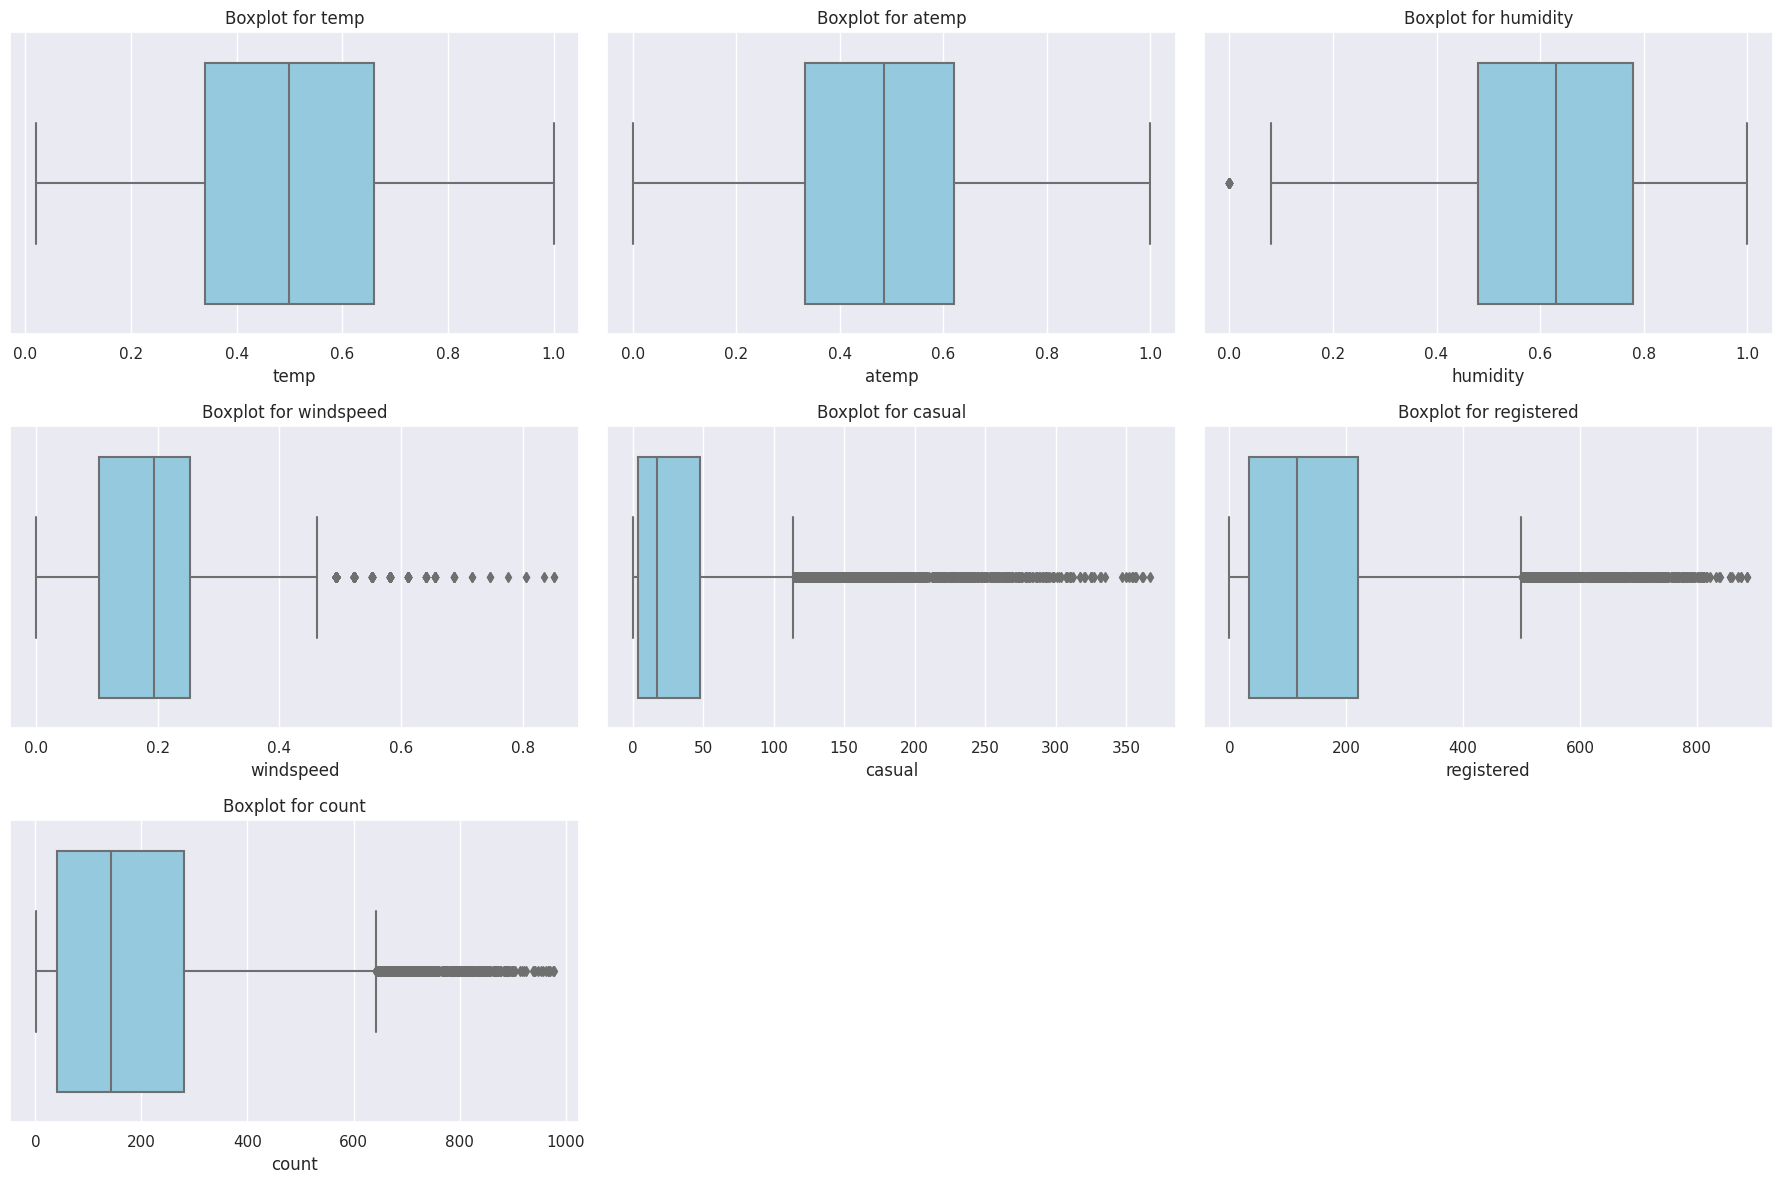

In [10]:
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(18, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=bike_dataset[col], color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [11]:
#check outlier
numeric_cols = bike_dataset.select_dtypes(include=['int64', 'float64']).columns
Q1 = bike_dataset['count'].quantile(0.10)
Q3 = bike_dataset['count'].quantile(0.85)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = bike_dataset[(bike_dataset['count'] < lower_bound) | (bike_dataset['count'] > upper_bound)]
# outliers.style.background_gradient(cmap='Greys')

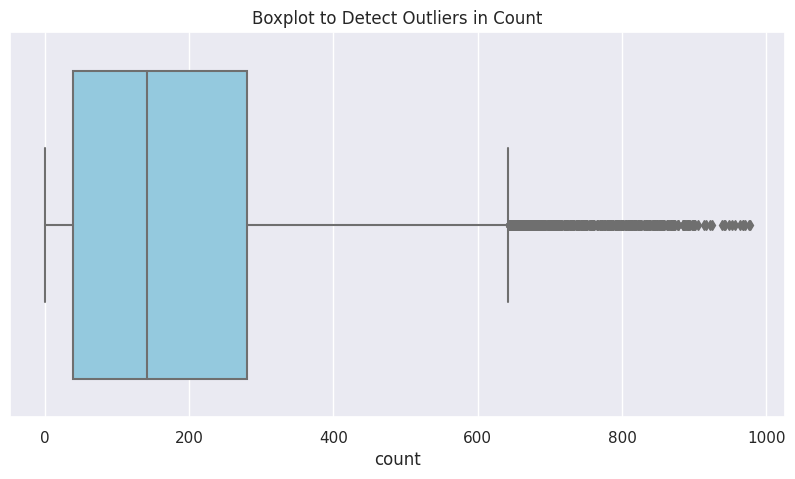

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=bike_dataset['count'], color='skyblue')
plt.title('Boxplot to Detect Outliers in Count')
plt.xlabel('count')
plt.show()

In [13]:
#removing outliers
bike_dataset = bike_dataset[(bike_dataset['count'] >= lower_bound) & (bike_dataset['count'] <= upper_bound)]
print("shape after outliers removal :",bike_dataset.shape)
#17,099 rows from ~17,379 → 280 rows removed

shape after outliers removal : (17367, 17)


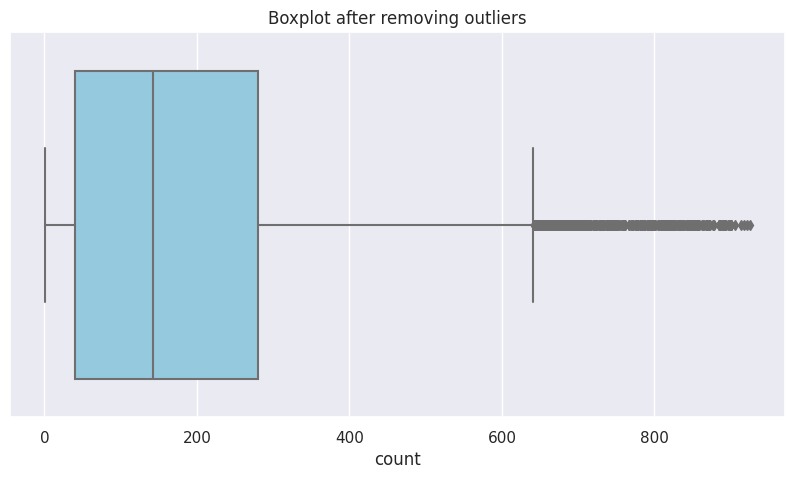

In [14]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['count'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('count')
 plt.show()

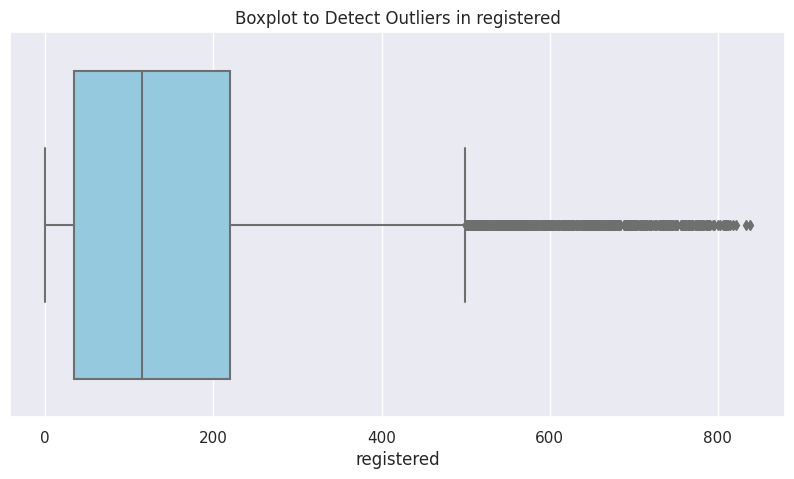

In [15]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['registered'], color='skyblue')
 plt.title('Boxplot to Detect Outliers in registered')
 plt.xlabel('registered')
 plt.show()

In [16]:

Q1 = bike_dataset['registered'].quantile(0.25)
Q3 = bike_dataset['registered'].quantile(0.80)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = bike_dataset[(bike_dataset['registered'] >= lower_bound) & (bike_dataset['registered'] <= upper_bound)]


In [17]:
bike_dataset = bike_dataset[(bike_dataset['registered'] >= lower_bound) & (bike_dataset['registered'] <= upper_bound)]
print("shape after outliers removal :",bike_dataset.shape)

shape after outliers removal : (16930, 17)


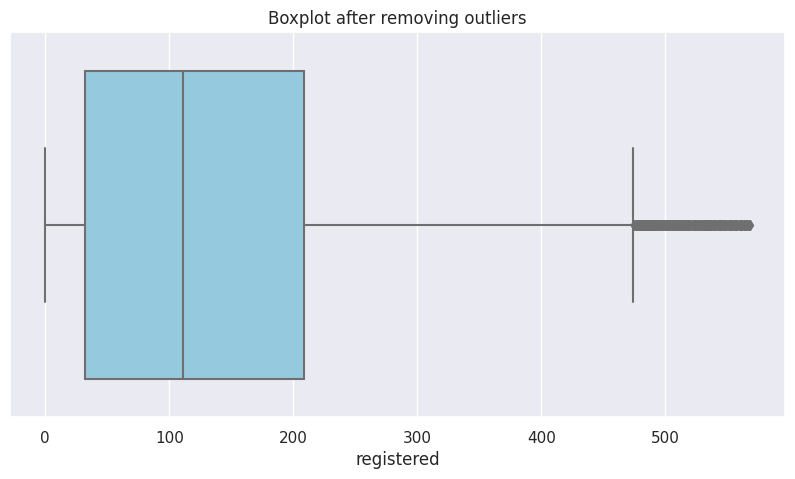

In [18]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['registered'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('registered')
 plt.show()

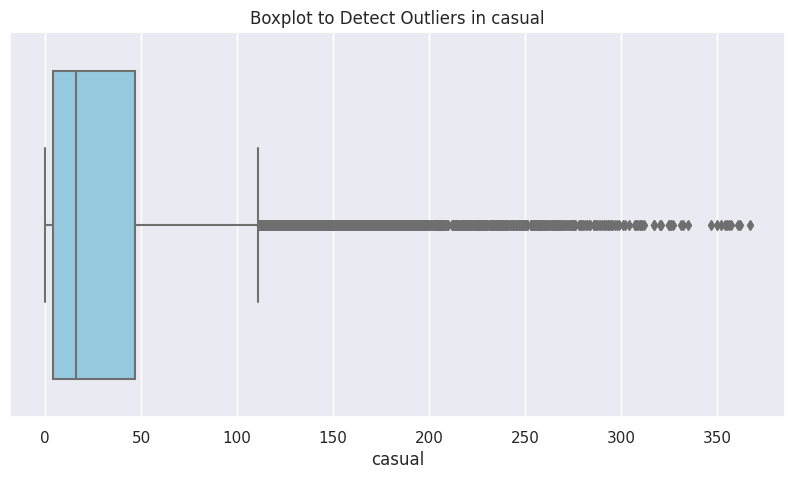

In [19]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['casual'], color='skyblue')
 plt.title('Boxplot to Detect Outliers in casual')
 plt.xlabel('casual')
 plt.show()

In [20]:
 Q1 = bike_dataset['casual'].quantile(0.15)
Q3 = bike_dataset['casual'].quantile(0.85)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = bike_dataset[(bike_dataset['casual'] >= lower_bound) & (bike_dataset['casual'] <= upper_bound)]


In [21]:
 bike_dataset = bike_dataset[(bike_dataset['casual'] >= lower_bound) & (bike_dataset['casual'] <= upper_bound)]
 print("shape after outliers removal :",bike_dataset.shape)

shape after outliers removal : (16364, 17)


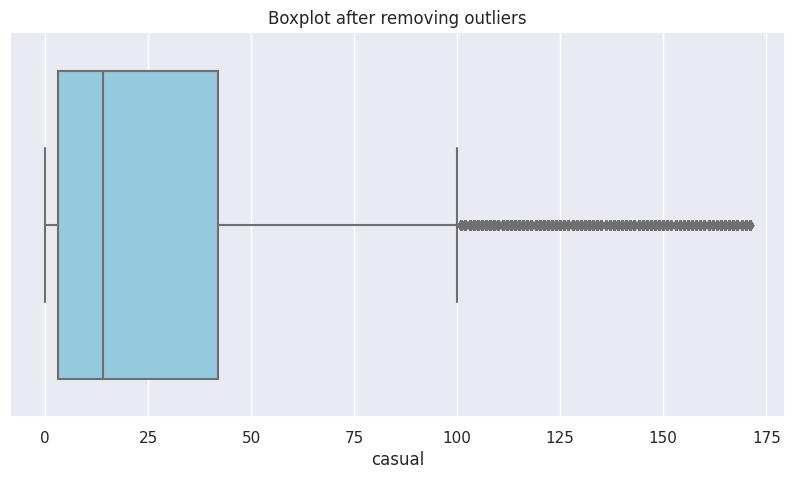

In [22]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['casual'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('casual')
 plt.show()

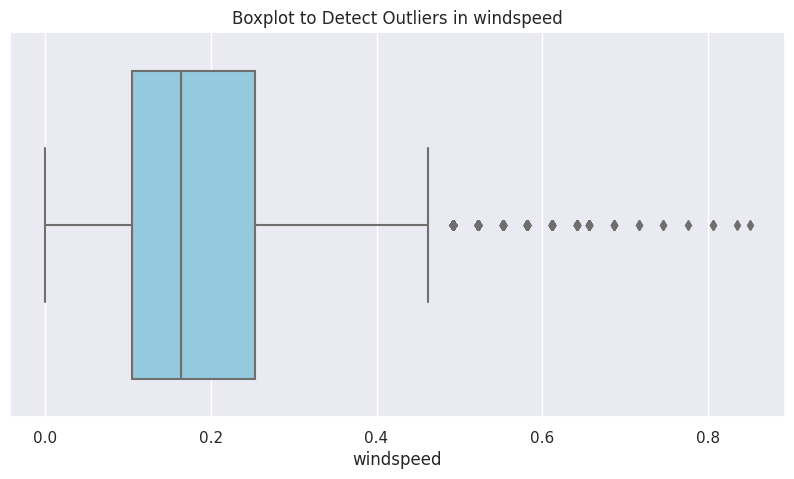

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=bike_dataset['windspeed'], color='skyblue')
plt.title('Boxplot to Detect Outliers in windspeed')
plt.xlabel('windspeed')
plt.show()



In [24]:
def remove_outliers_iteratively(bike_dataset):
    prev_shape = None
    while prev_shape != bike_dataset.shape:
        prev_shape = bike_dataset.shape
        Q1 = bike_dataset['windspeed'].quantile(0.20)
        Q3 = bike_dataset['windspeed'].quantile(0.80)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        bike_dataset = bike_dataset[
            (bike_dataset['windspeed'] >= lower) & 
            (bike_dataset['windspeed'] <= upper)
        ]
    return bike_dataset

In [25]:
bike_dataset = remove_outliers_iteratively(bike_dataset)
print("shape after outliers removal :",bike_dataset.shape)

shape after outliers removal : (16259, 17)


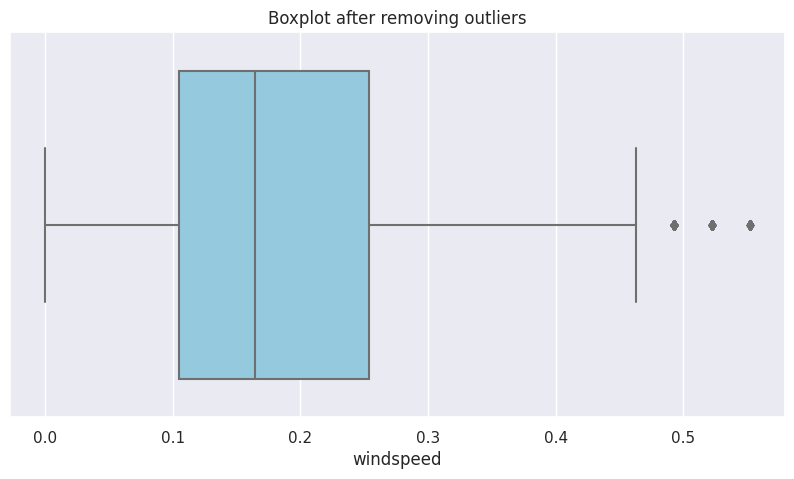

In [26]:
 plt.figure(figsize=(10, 5))
 sns.boxplot(x=bike_dataset['windspeed'], color='skyblue')
 plt.title('Boxplot after removing outliers')
 plt.xlabel('windspeed')
 plt.show()

In [27]:
# function to determine if a given hour is typically a rush hour
def is_rush_hour(hour):
    if (7 <= hour <= 9) or (17 <= hour <= 19):
        return 1
    else:
        return 0

# create the new 'rush_hour' feature
bike_dataset['rush_hour'] = bike_dataset['hour'].apply(is_rush_hour)

bike_dataset.head().style.background_gradient(cmap='Greens')


,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,rush_hour
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1,0


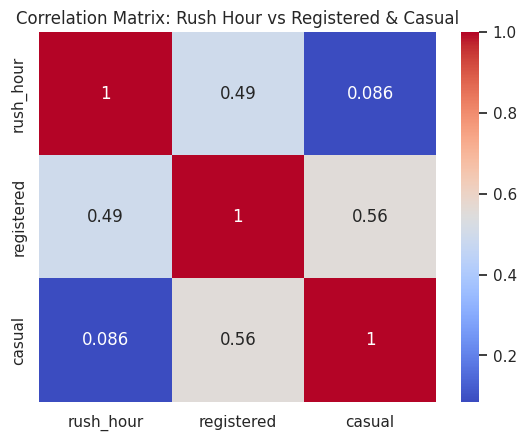

In [28]:
correlation = bike_dataset[['rush_hour', 'registered', 'casual']].corr()
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Rush Hour vs Registered & Casual")
plt.show()